In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import collections 
import os 

In [34]:
def get_images_with_hists(dir='data', scl=0.25): 
    # List all files ending with .jpg and .jpeg 
    files = [f for f in os.listdir(dir) if f.endswith('.jpg') or f.endswith('.jpeg')]

    images = []

    # Create a list of grayscale images
    for f in files:
        
        # Read the image 
        img = cv2.imread(os.path.join(dir, f))

        # Convert the image to grayscale
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        h,w = img_gray.shape

        # Resize the image
        img_gray = cv2.resize(img_gray, (int(w*scl), int(h*scl)), interpolation = cv2.INTER_AREA)

        # Flat the image array
        img_flatten = img_gray.flatten()

        # Compute the histogram
        hist256 = np.histogram(img_flatten, bins=256, range=(0,256))
        hist10  = np.histogram(img_flatten, bins=10, range=(0,256))

        images.append({ "path": f, "img": img_gray, "hist256": hist256, "hist10": hist10 })

    return images

In [57]:
images = get_images_with_hists(dir="gaugan", scl=1)

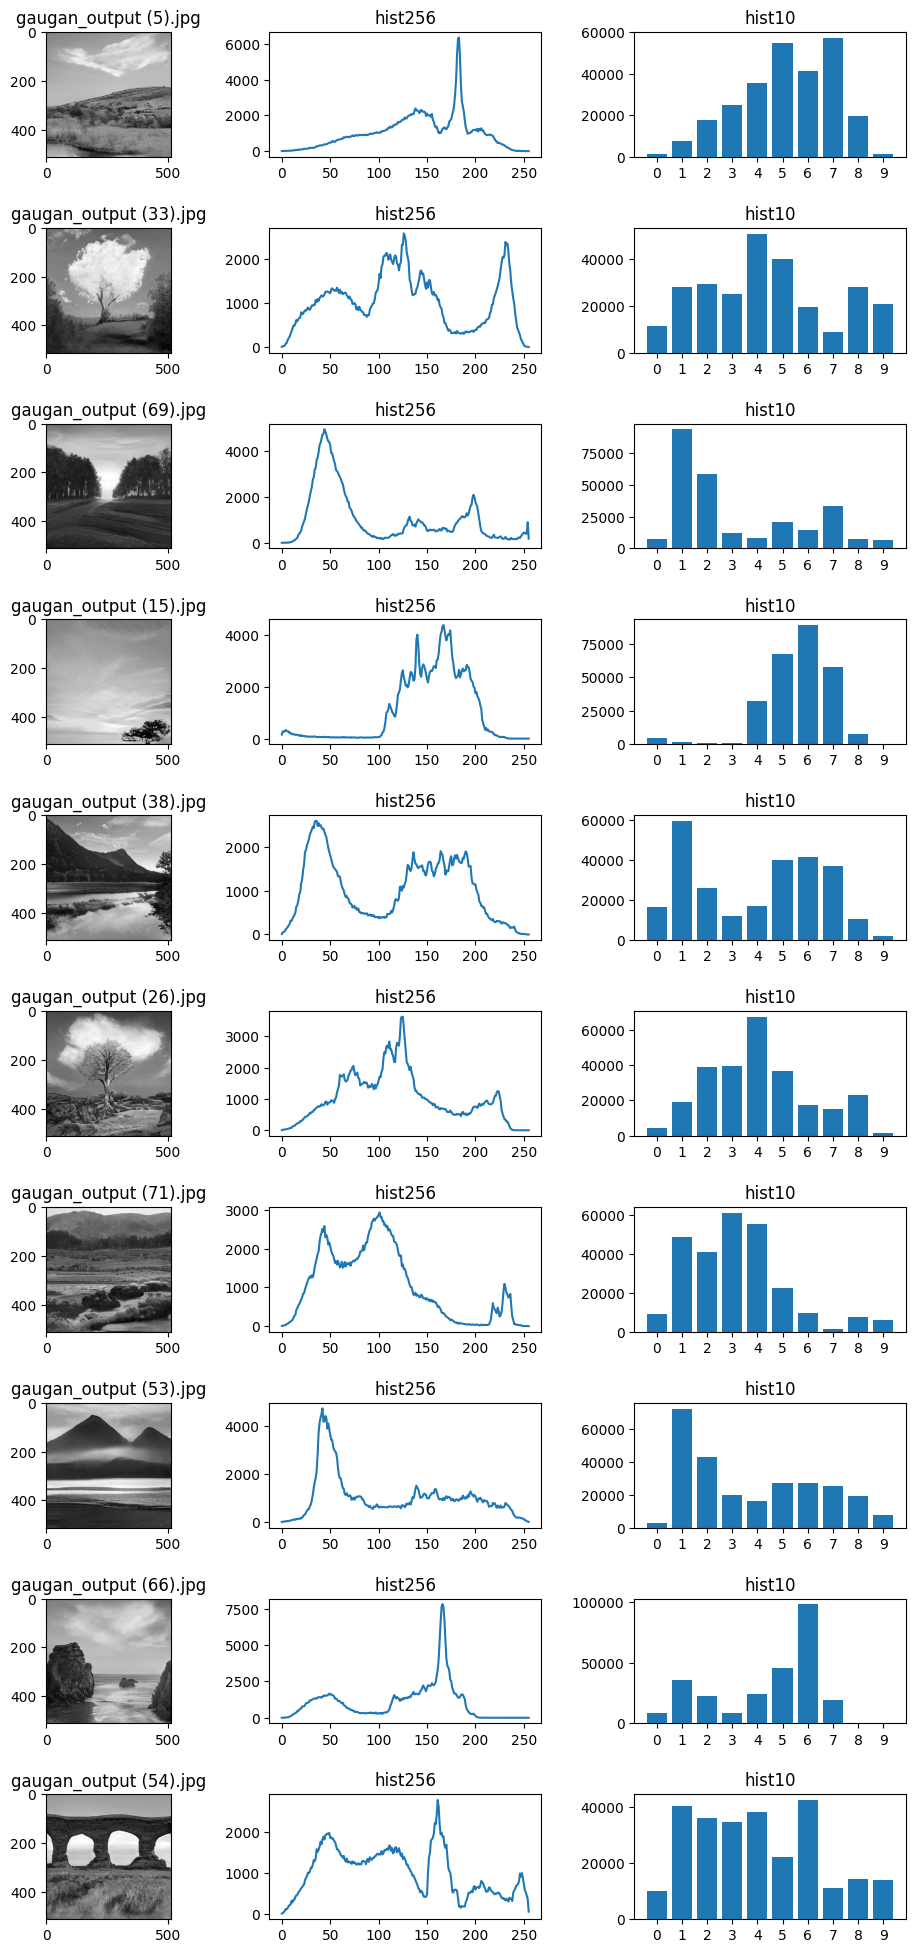

In [58]:
# Plot random 10 images and their both histograms
fig, axs = plt.subplots(10, 3, figsize=(10, 20), gridspec_kw={'width_ratios': [1, 2, 2]})
fig.tight_layout(pad=3.0)
for i in range(10):
    key = np.random.randint(0, len(images))
    axs[i][0].imshow(images[key]['img'], cmap='gray')
    axs[i][0].set_title(images[key]['path'])
    axs[i][1].plot(range(256), images[key]['hist256'][0])
    axs[i][1].set_title('hist256')
    axs[i][2].bar(range(10), images[key]['hist10'][0])
    axs[i][2].set_title('hist10')
    axs[i][2].set_xticks(range(10))

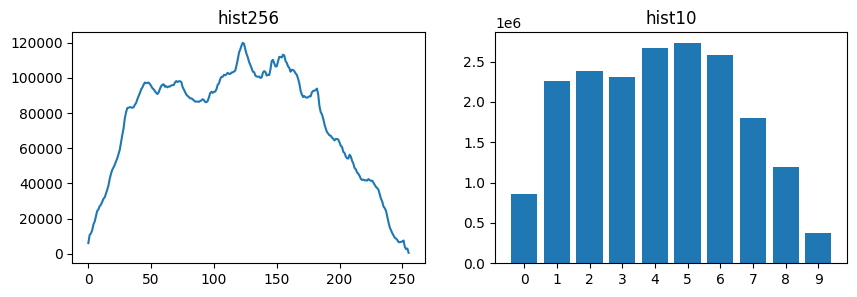

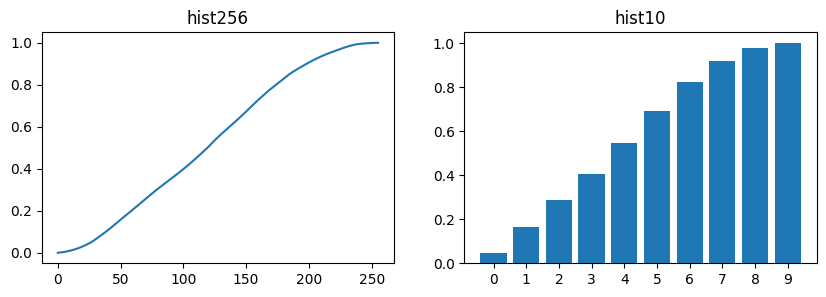

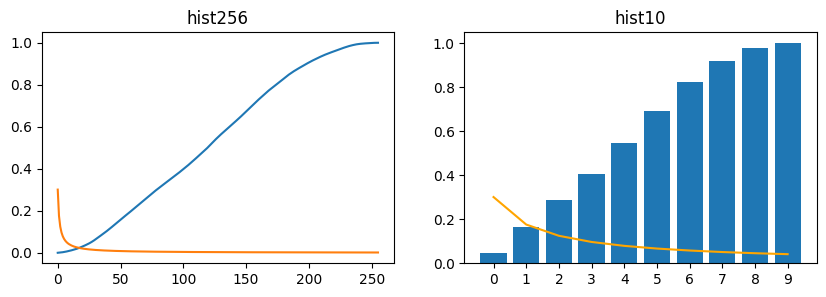

In [67]:
# Combine histograms of all images
hist256 = np.zeros(256)
hist10  = np.zeros(10)

for i in range(len(images)):
    hist256 += images[i]['hist256'][0]
    hist10  += images[i]['hist10'][0]

# Plot the combined histograms
fig, axs = plt.subplots(1, 2, figsize=(10, 3))
axs[0].plot(range(256), hist256)
axs[0].set_title('hist256')
axs[1].bar(range(10), hist10)
axs[1].set_title('hist10')
axs[1].set_xticks(range(10))

# Plot the probabilities
fig, axs = plt.subplots(1, 2, figsize=(10, 3))
axs[0].plot(range(256), np.cumsum(hist256)/np.sum(hist256))
axs[0].set_title('hist256')
axs[1].bar(range(10), np.cumsum(hist10)/np.sum(hist10))
axs[1].set_title('hist10')
axs[1].set_xticks(range(10))

benford = lambda i = 1: np.log10(1 + 1/i)

# Calculate benford probabilities
benford_probs = [benford(i) for i in range(1, 11)]

# Plot the probabilities
fig, axs = plt.subplots(1, 2, figsize=(10, 3))
axs[0].plot(range(256), np.cumsum(hist256)/np.sum(hist256))
axs[0].plot(range(256), [benford(i) for i in range(1, 257)])
axs[0].set_title('hist256')
axs[1].bar(range(10), np.cumsum(hist10)/np.sum(hist10))
axs[1].plot(range(10), benford_probs, "orange")
axs[1].set_title('hist10')
axs[1].set_xticks(range(10))



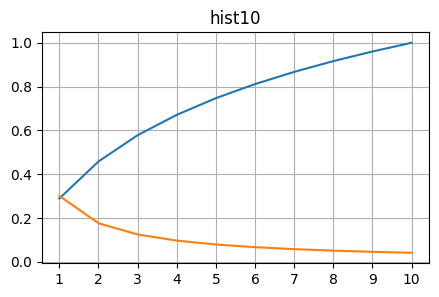

[0.3010299956639812,
 0.17609125905568124,
 0.12493873660829993,
 0.09691001300805642,
 0.07918124604762482,
 0.06694678963061322,
 0.05799194697768673,
 0.05115252244738129,
 0.04575749056067514,
 0.04139268515822508]

In [72]:
benford_probs = [benford(i) for i in range(1, 11)]

# Plot the cumulative sum of the benford probabilities
fig, axs = plt.subplots(1, 1, figsize=(5, 3))
axs.plot(range(1,11), np.cumsum(benford_probs)/np.sum(benford_probs))
axs.plot(range(1,11), [benford(i) for i in range(1, 11)])
axs.set_xticks(range(1,11))
axs.grid()

axs.set_title('hist10')
 
plt.show()

print(benford_probs)